In [2]:
pip install scipy scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scipy in c:\python\lib\site-packages (1.13.0)




[notice] A new release of pip is available: 23.1.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Second Assignment

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("london_weather.csv")
df.isnull().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [5]:
df.fillna(df.mean(), inplace=True)
# df.dropna(axis=0, inplace=True) # Romoves Rows with null values
df.isnull().sum()

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

In [6]:
df.duplicated().sum()

0

<Axes: >

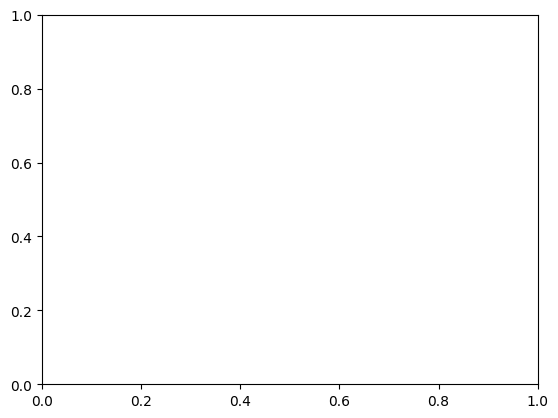

In [20]:
# import scipy
# from scipy import stats
# outliers = stats.zscore(df)
# print(outliers)
# df = df[(np.abs(outliers < 3)).all(axis=1)]
# df.count()

import scipy
from scipy import stats
outliers = stats.zscore(df)
# print(outliers)
df = df[(np.abs(outliers < 3)).all(axis=1)]

In [8]:
df.info

<bound method DataFrame.info of            date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
4      19790105          6.0       2.0              29.0       5.6       -0.8   
5      19790106          5.0       3.8              39.0       8.3       -0.5   
6      19790107          8.0       0.0              13.0       8.5        1.5   
7      19790108          8.0       0.1              15.0       5.8        6.9   
8      19790109          4.0       5.8              50.0       5.2        3.7   
...         ...          ...       ...               ...       ...        ...   
15336  20201227          1.0       0.9              32.0       7.5        7.5   
15337  20201228          7.0       3.7              38.0       3.6        1.1   
15338  20201229          7.0       0.0              21.0       4.1        2.6   
15339  20201230          6.0       0.4              22.0       5.6        2.7   
15340  20201231          7.0       1.3              34.0       1.5       -0.8

In [9]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['snow_depth'] = df['snow_depth'].astype('float')
df['snow_depth_scaled'] = scaler.fit_transform(df[['snow_depth']])
df.describe


<bound method NDFrame.describe of            date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
4      19790105          6.0       2.0              29.0       5.6       -0.8   
5      19790106          5.0       3.8              39.0       8.3       -0.5   
6      19790107          8.0       0.0              13.0       8.5        1.5   
7      19790108          8.0       0.1              15.0       5.8        6.9   
8      19790109          4.0       5.8              50.0       5.2        3.7   
...         ...          ...       ...               ...       ...        ...   
15336  20201227          1.0       0.9              32.0       7.5        7.5   
15337  20201228          7.0       3.7              38.0       3.6        1.1   
15338  20201229          7.0       0.0              21.0       4.1        2.6   
15339  20201230          6.0       0.4              22.0       5.6        2.7   
15340  20201231          7.0       1.3              34.0       1.5       -0

In [10]:
df.describe()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,snow_depth_scaled
count,1.489100e+04,14891.000000,14891.000000,14891.000000,14891.000000,14891.000000,14891.000000,14891.000000,14891.000000,14891.000000,14891.000000
mean,1.999567e+07,5.241678,4.407783,119.746181,15.452806,11.511277,7.578955,1.273535,101560.346949,0.006839,0.006839
std,1.209606e+05,2.065280,4.027065,88.823260,6.492324,5.652840,5.259473,2.429207,1040.289338,0.058128,0.058128
min,1.979010e+07,0.000000,0.000000,8.000000,-6.200000,-7.600000,-9.100000,0.000000,95960.000000,0.000000,0.000000
25%,1.989072e+07,4.000000,0.500000,42.000000,10.600000,7.100000,3.600000,0.000000,100950.000000,0.000000,0.000000
50%,1.999122e+07,6.000000,3.600000,97.000000,15.100000,11.400000,7.800000,0.000000,101650.000000,0.000000,0.000000
75%,2.010062e+07,7.000000,7.300000,187.000000,20.300000,16.000000,11.700000,1.400000,102260.000000,0.000000,0.000000
max,2.020123e+07,9.000000,16.000000,380.000000,35.000000,27.800000,22.300000,12.800000,104430.000000,1.000000,1.000000


In [25]:
df = pd.read_csv("academic.csv")
df.dtypes

gender                       object
NationalITy                  object
PlaceofBirth                 object
StageID                      object
GradeID                      object
SectionID                    object
Topic                        object
Semester                     object
Relation                     object
raisedhands                 float64
VisITedResources              int64
AnnouncementsView             int64
Discussion                    int64
ParentAnsweringSurvey        object
ParentschoolSatisfaction     object
StudentAbsenceDays           object
Class                        object
dtype: object

<Axes: xlabel='Discussion', ylabel='Count'>

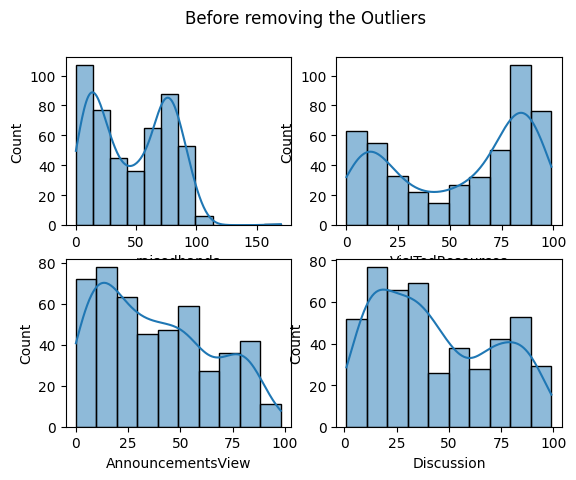

In [27]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Before removing the Outliers')
sns.histplot(x='raisedhands', data=df, ax=axes[0,0], kde=True)
sns.histplot(x='VisITedResources', data=df, ax=axes[0,1], kde=True)
sns.histplot(x='AnnouncementsView', data=df, ax=axes[1,0], kde=True)
sns.histplot(x='Discussion', data=df, ax=axes[1,1], kde=True)

<Axes: xlabel='raisedhands'>

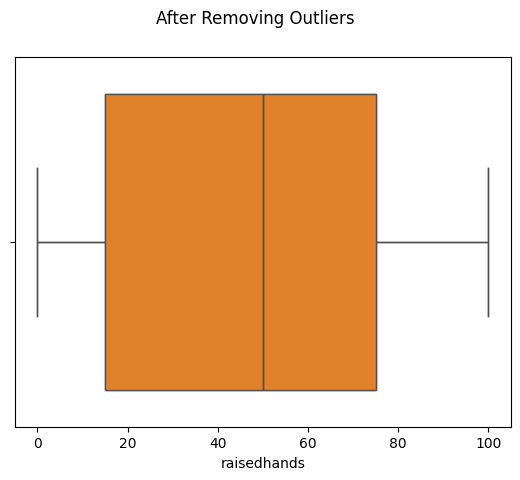

In [61]:
def detectOutliers(df, var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1

    high, low = Q3+1.5*IQR, Q1-1.5*IQR

    df = df[((df[var] >= low) & (df[var] <= high))]
    return df

# fig, axes = plt.subplots(1,2)
# sns.histplot(x='raisedhands', data=df, kde=True, ax=axes[0,0])
plt.suptitle("Before Removing Outliers")
sns.boxplot(x='raisedhands', data=df)
# # plt.show()
df = detectOutliers(df, 'raisedhands')
plt.suptitle("After Removing Outliers")
sns.boxplot(x='raisedhands', data=df)
# plt.show()

<Axes: xlabel='Discussion', ylabel='Count'>

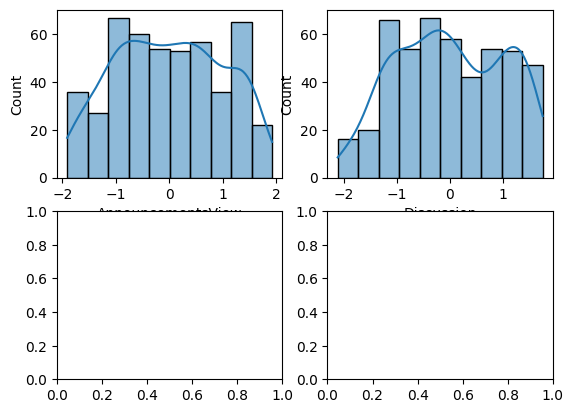

In [66]:
from sklearn.preprocessing import PowerTransformer
skewness = PowerTransformer(standardize=True)
df['AnnouncementsView']  = skewness.fit_transform(df['AnnouncementsView'].values.reshape(-1,1))
df['Discussion']  = skewness.fit_transform(df['Discussion'].values.reshape(-1,1))

fig, axes = plt.subplots(2,2)
sns.histplot(x='AnnouncementsView', data=df, kde=True, ax=axes[0,0])
sns.histplot(x='Discussion', data=df, kde=True, ax=axes[0,1])